In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.style.use('seaborn-paper')
rcParams.update({"figure.autolayout": True})

df = pd.read_csv('../slurm/results/scan_point_cloud_construction.csv',
                 names=['n_sectors', 'sector_di', 'sector_ds', 'pt_thld',
                        'n_hits', 'n_hits_err', 'n_hits_ext', 'n_hits_ext_err',
                        'n_hits_ratio', 'n_hits_ratio_err',
                        'n_unique_pids', 'n_unique_pids_err', 
                        'majority_contained', 'majority_contained_err'])
df.head()

,n_sectors,sector_di,sector_ds,pt_thld,n_hits,n_hits_err,n_hits_ext,n_hits_ext_err,n_hits_ratio,n_hits_ratio_err,n_unique_pids,n_unique_pids_err,majority_contained,majority_contained_err
0,8,-0.00025,0.8,0.5,6516.416886,735.001458,4911.443579,556.537013,0.753773,0.012548,849.424395,100.624946,0.850339,0.019219
1,8,-0.00050,0.8,0.9,6529.770647,730.822813,4551.084783,518.677665,0.696941,0.013372,799.744310,94.545977,0.802512,0.036743
2,8,-0.00050,0.9,0.9,6531.979970,731.646464,5147.715832,582.219785,0.788068,0.011522,892.922877,105.237557,0.824425,0.031146
3,8,-0.00050,0.8,0.5,6516.852329,734.600400,4541.133267,520.864663,0.696799,0.013317,797.898239,94.965167,0.795514,0.025025
4,8,-0.00050,1.0,0.9,6532.182936,732.007360,5772.067195,652.031715,0.883596,0.009266,984.395051,115.869570,0.844190,0.030914


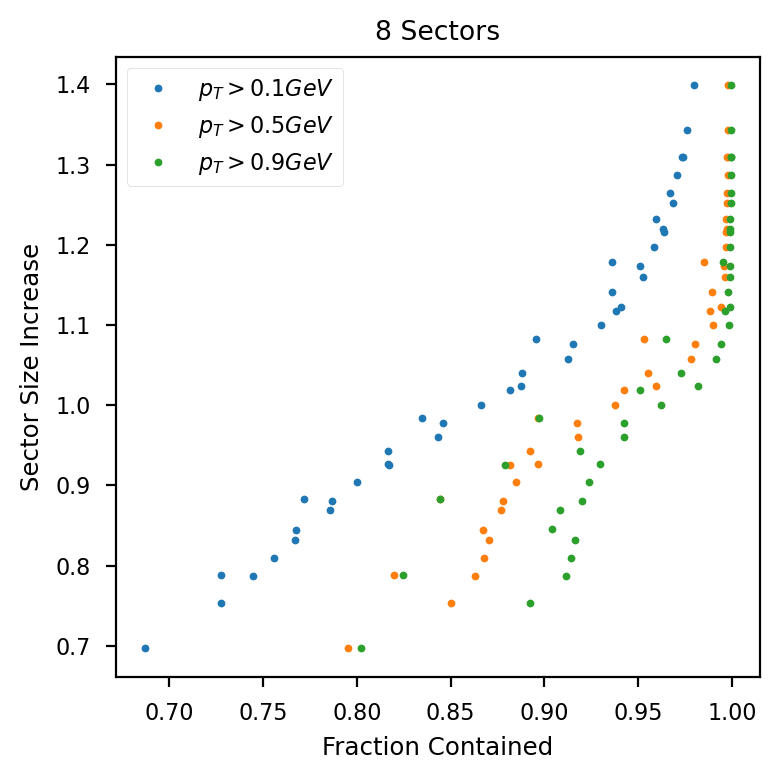

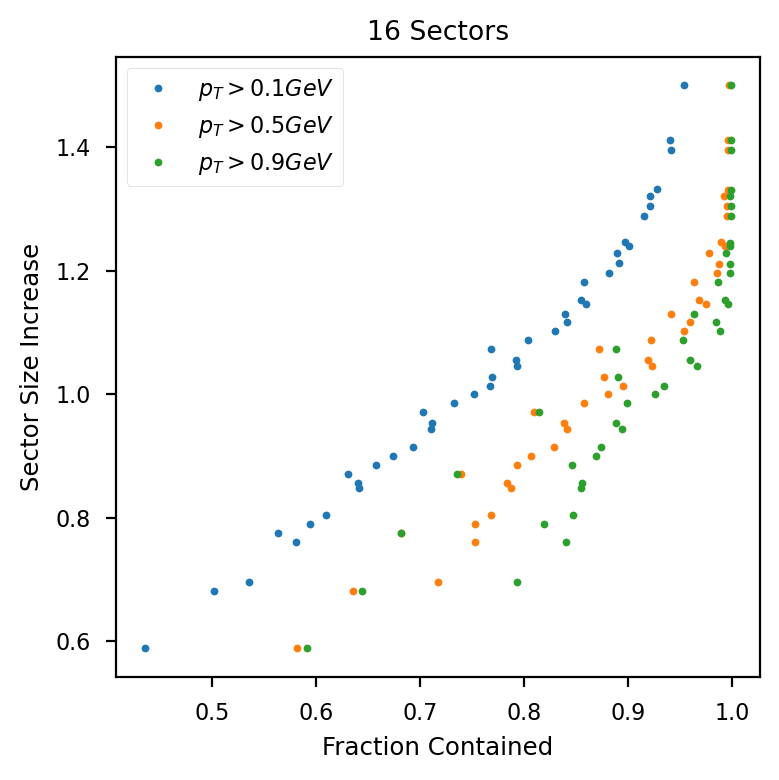

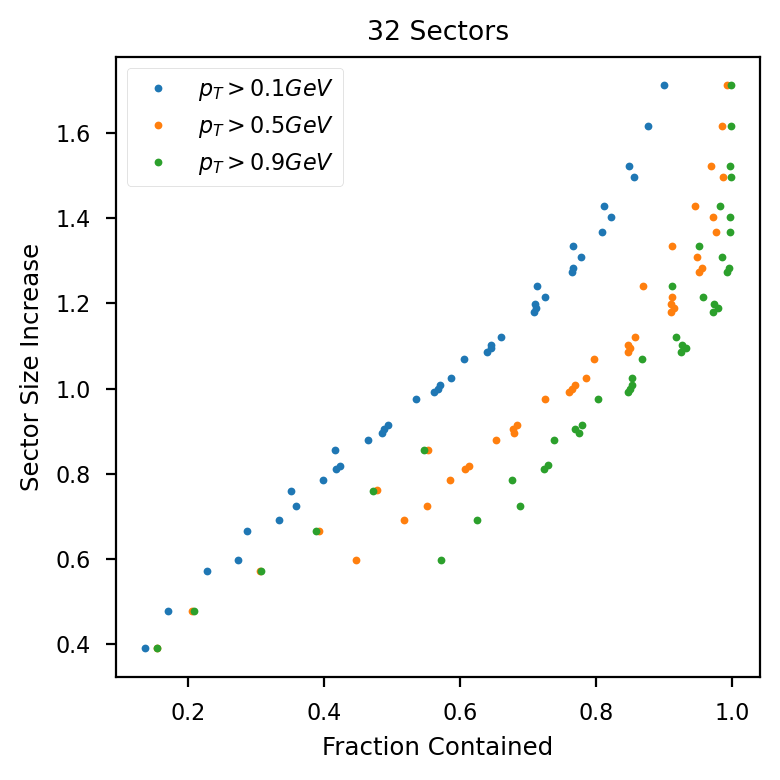

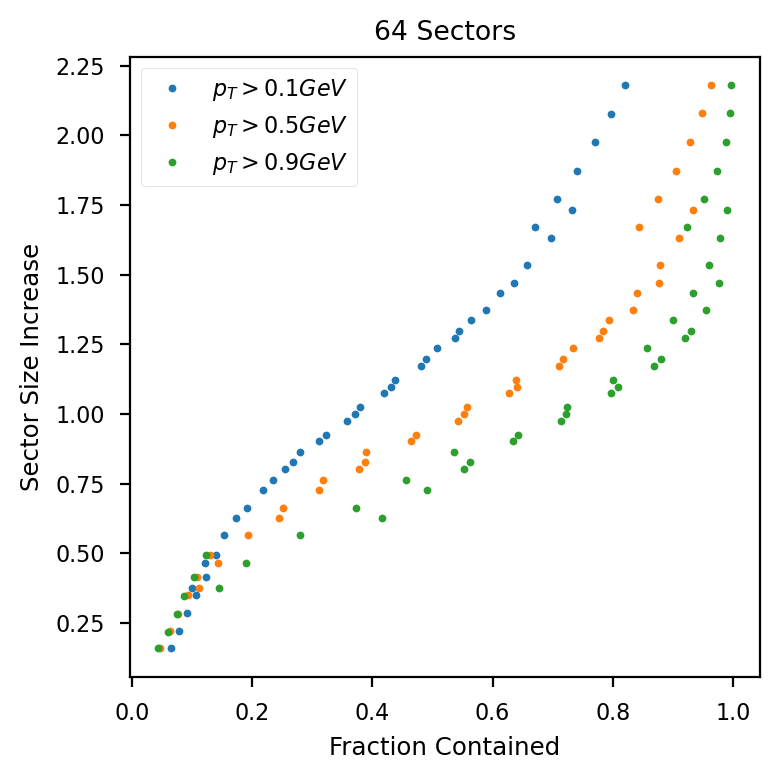

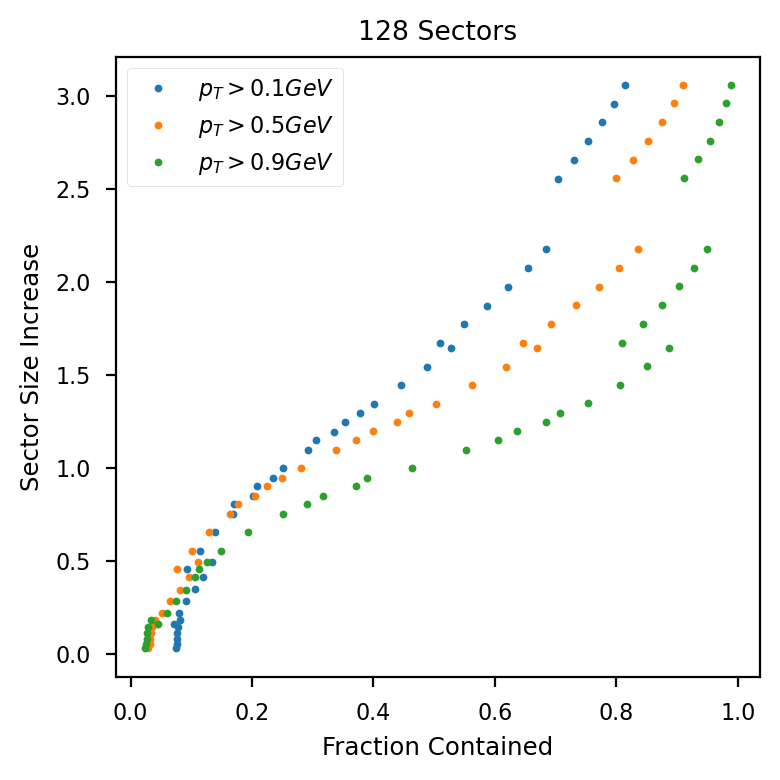

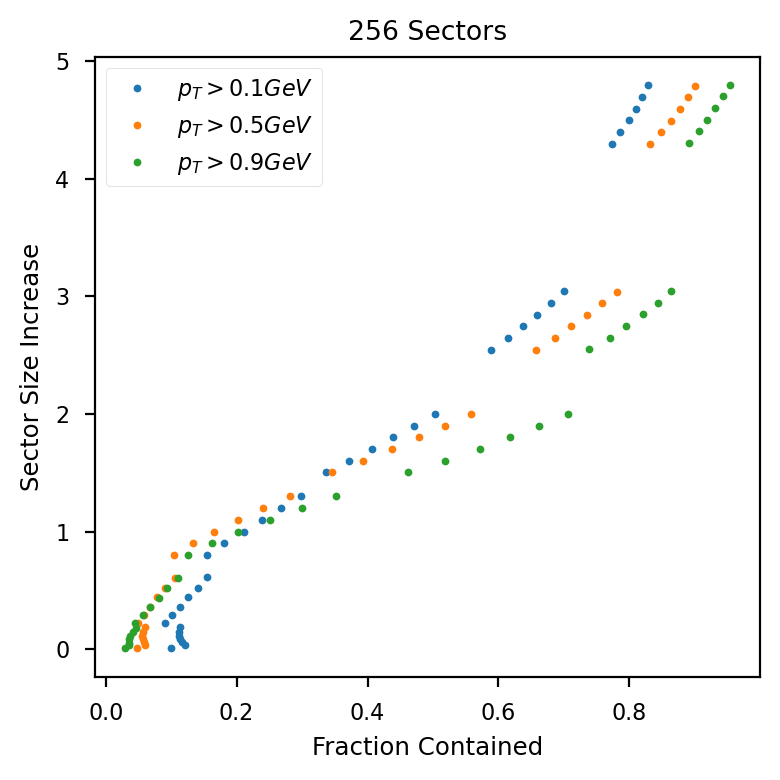

In [22]:
grouped = df.groupby(['n_sectors'])
thlds = np.unique(df['pt_thld'])
for n, sector in grouped:
    fig, ax = plt.subplots(dpi=200, figsize=(4,4))
    for thld in thlds:
        mask = (sector['pt_thld']==thld)
        ax.plot(sector['majority_contained'][mask], 
                sector['n_hits_ratio'][mask], 
                marker='.', linestyle='', 
                label=rf'$p_T>{thld}GeV$')
        ax.set_xlabel('Fraction Contained')
        ax.set_ylabel('Sector Size Increase')
    ax.set_title(f'{n} Sectors')
    plt.legend(loc='best')
    plt.show()

In [49]:
wps = df[(df.n_sectors==32) & (df.majority_contained>0.99) & (df.n_hits_ratio < 1.3)]
display(wps.head())
thlds = np.unique(df['pt_thld'])
for index, wp in wps.iterrows():
    for thld in thlds: 
        print(f'at pt>{thld}')
        display(df[(df.n_sectors==wp.n_sectors) & 
                   (df.sector_di==wp.sector_di) & 
                   (df.sector_ds==wp.sector_ds) & 
                   (df.pt_thld==thld)][['majority_contained',
                                        'majority_contained_err']])

,n_sectors,sector_di,sector_ds,pt_thld,n_hits,n_hits_err,n_hits_ext,n_hits_ext_err,n_hits_ratio,n_hits_ratio_err,n_unique_pids,n_unique_pids_err,majority_contained,majority_contained_err
324,32,0.0000,1.3,0.9,1800.879823,229.724071,2307.791118,283.621223,1.282567,0.030121,461.094725,56.378892,0.996192,0.009456
336,32,0.0001,1.2,0.9,1800.879823,229.724071,2292.941984,281.661804,1.274312,0.029215,459.814191,56.406272,0.993616,0.012366


at pt>0.1


,majority_contained,majority_contained_err
325,0.76633,0.035637


at pt>0.5


,majority_contained,majority_contained_err
327,0.955961,0.021033


at pt>0.9


,majority_contained,majority_contained_err
324,0.996192,0.009456


at pt>0.1


,majority_contained,majority_contained_err
338,0.764365,0.035521


at pt>0.5


,majority_contained,majority_contained_err
337,0.95143,0.021318


at pt>0.9


,majority_contained,majority_contained_err
336,0.993616,0.012366
